# **Notebook 2: Statistics and Visualisations**

## Objectives

* Perform statistical tests to validate project hypotheses
* Create visualisations to show relationships between measures

## Inputs

* clean_data.csv produced by Notebook 1

## Outputs

* This notebook generates tests and visualisations to validate the project hypotheses 

## Additional Comments

* A reminder that this dataset focuses on a subset of countries deemed to be most impactful for emissions and analysis is reflective of these countries and not the whole world.



---

# Import Packages and Data

Import packages needed to run this notebook

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm

Import cleaned data

In [2]:
#set path to clean data file
path = "../raw_data/clean_data.csv"

# read data into dataframe
df_clean = pd.read_csv(path)

# display data types to see if any need to be changed
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2842 non-null   object 
 1   iso_code                        2842 non-null   object 
 2   year                            2842 non-null   int64  
 3   primary_energy_consumption      2842 non-null   float64
 4   co2                             2842 non-null   float64
 5   co2_including_luc               2793 non-null   float64
 6   total_ghg                       2842 non-null   float64
 7   co2_growth_abs                  2842 non-null   float64
 8   co2_growth_prct                 2842 non-null   float64
 9   co2_per_capita                  2842 non-null   float64
 10  co2_per_gdp                     2842 non-null   float64
 11  energy_per_capita               2842 non-null   float64
 12  energy_per_gdp                  28

Change year column to date type and rename Name to country

In [10]:
# convert year to datetime type
df_clean['year'] = pd.to_datetime(df_clean['year'], format='%Y')

# rename 'Name' column to 'country'
df_clean = df_clean.rename(columns={'Name': 'country'})

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842 entries, 0 to 2841
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   country                         2842 non-null   object        
 1   iso_code                        2842 non-null   object        
 2   year                            2842 non-null   datetime64[ns]
 3   primary_energy_consumption      2842 non-null   float64       
 4   co2                             2842 non-null   float64       
 5   co2_including_luc               2793 non-null   float64       
 6   total_ghg                       2842 non-null   float64       
 7   co2_growth_abs                  2842 non-null   float64       
 8   co2_growth_prct                 2842 non-null   float64       
 9   co2_per_capita                  2842 non-null   float64       
 10  co2_per_gdp                     2842 non-null   float64       
 11  ener

---

# Hypothesis 1: Global average CO₂ emissions per capita
I hypothesize that global average CO₂ emissions per capita have declined over the past decade due to increased adoption of renewable energy.<br>
To test this I will first create a line chart to show changes in CO2 emissions per capita over time.<br>
The median value will be used to create the average as it is less influenced by outliers

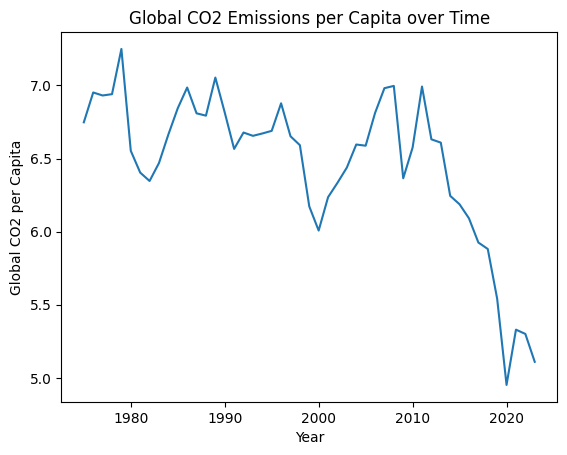

In [23]:
# create dataframe with values grouped by year
df_global = df_clean.groupby(['year']).median(numeric_only=True)

# create a linechart to show value changes over time
sns.lineplot(df_global, x='year', y='co2_per_capita')
plt.title("Global CO2 Emissions per Capita over Time")
plt.xlabel("Year")
plt.ylabel("Global CO2 per Capita")
plt.show()


This chart shows a general downward trend overtime which is more marked in the last 10 years.<br>
I will conduct a linear regression to see if this is a significant change.<br>
(Statistical test suggested by Copilot with fixes from GPT-5)

In [38]:
# linear regression of CO2 Emissions per Capita over time
# Create numeric year variable from the DatetimeIndex, filter for years > 1993
mask = df_global.index.year > 1993

# select the filtered rows so X and y share the same index (avoids alignment issues)
df_recent = df_global.loc[mask]

# build exog with the same DatetimeIndex as y
X = pd.DataFrame({'year': df_recent.index.year}, index=df_recent.index)
X = sm.add_constant(X)  # add intercept
y = df_recent['co2_per_capita']

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         co2_per_capita   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     24.34
Date:                Thu, 06 Nov 2025   Prob (F-statistic):           3.32e-05
Time:                        15:46:03   Log-Likelihood:                -15.488
No. Observations:                  30   AIC:                             34.98
Df Residuals:                      28   BIC:                             37.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         94.0133     17.782      5.287      0.0

This test shows a significant difference for per capita CO2 emissions over the last 10 years of data (p<0.05).<br>
The negative coefficient value (-0.0437) indicates that per capita emissions are trending downwards.<br>
R-squared measures the goodness of fit of the model in a range from 0 (no fit) to 1 (perfect fit), a score of 0.465 is low but within the acceptable boundaries for climate research.

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Conclusions and Next Steps

* H1: Global average CO₂ emissions per capita<br>
    Global average CO2 emissions per person have fallen significantly over the last 10 years (leading up to 2023). This is likely due to increased adoption of renewable energy sources and improved awareness of the impact of CO2 emissions on climate change.